In [13]:
#### OSCILADOR ARMÓNICO AMORTIGUADO FORZADO ####

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from math import *
import matplotlib.animation as animation

# Condiciones iniciales

x_0 = 5 # Posición inicial (arb)
v_0 = 0 # Velocidad inicial (arb)

# Definiciones iniciales
w_0 = 0.5 # Frecuencia natural x>0
W_0 = 4 # Frecuencia natural x<0
amort = 0 # constante de amortiguamiento
f_0 = 0 # Amplitud de la fuerza por unidad de masa
w = 1.4 # Frecuencia fuerza externa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Resolución numérica de la ecuación diferencial

m = 2 # Número de ecuaciones diferenciales de primer orden que queremos resolver

def EDO1(x,y): # Escribimos todas las EDOs necesarias apra resolver el problema
    return y[1]

def EDO2(x,y): # Usaremos esta ecuación para x>0
    if y[0] >= 0:
        return -2*amort*y[1]-w_0**2*y[0]+f_0*np.cos(w*x)
    else:
        return -2*amort*y[1]-W_0**2*y[0]+f_0*np.cos(w*x)

def RK4(EDO, x0, y0, xf, h):

    # EDO: Array de ecuaciones diferenciales de primer orden
    # x0: valor inicial de la variable independiente
    # y0: valor de la variable dependiente evaluada en x = x0 (condición inicial si x=0)
    # xf: valor final de la variable independiente
    # h: tamaño del paso

    n = int((xf-x0)/h)+1 # Calculamos el número de puntos
    
    x = np.empty(n) # Creamos arrays donde almacenar la solución
    y = np.empty([n,m])
    k1,k2,k3,k4= np.empty(m),np.empty(m),np.empty(m),np.empty(m)

    x[0] = x0 # Aplicamos las condiciones iniciales
    for j in range(m):
        y[0,j] = y0[j]
    
    for i in range(n-1): # Implementamos el método RK4
        x[i] = x0+i*h
        for j in range(m):
            k1[j] = h*EDO[j](x[i],y[i,:])
        for j in range(m):
            k2[j] = h*EDO[j](x[i]+0.5*h,y[i]+0.5*k1)
        for j in range(m):
            k3[j] = h*EDO[j](x[i]+0.5*h,y[i]+0.5*k2)
        for j in range(m):
            k4[j] = h*EDO[j](x[i]+h,y[i]+k3)
        for j in range(m):
            y[i+1,j] = y[i,j]+(1/6)*(k1[j]+2*k2[j]+2*k3[j]+k4[j]);

    x[n-1] = xf
            
    return x,y

In [15]:
EDO = np.array([EDO1,EDO2]) # Array de EDOs del el sistema

h = 0.01 # Paso de tiempo
tf = 100 # Variables independientes escogidas
t0 = 0
y0 = np.array([x_0,v_0]) # Establecemos las condiciones iniciales
T = 2*pi/w
n = int(tf/T) # Número de puntos del diagrama de Poincaré

t,y = RK4(EDO,t0,y0,tf,h) # Resolvemos el sistema
t2,y2 = RK4(EDO,t0,[x_0+0.001,v_0+0.001],tf,h) # Resolvemos el sistema

x = y[:,0]
v = y[:,1]
x2 = y2[:,0]
v2 = y2[:,1]

ind = np.array([np.searchsorted(t,T*(i+1)+0.9) for i in range(n-1)]) # Calculamos los puntos del diagrama de Poincaré
xp = x[ind]
vp = v[ind]

In [16]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

Text(0.5, 0, 'x(m)')

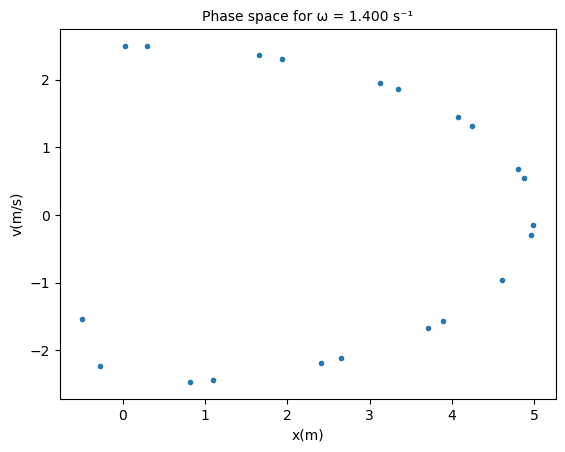

In [12]:
plt.plot(x[:],v[:])
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title('Phase space for ω = '+str(format(w,'.3f'))+' s⁻¹',fontsize = 10)
plt.ylabel('v(m/s)',fontsize = 10)
plt.xlabel('x(m)',fontsize = 10)
#plt.savefig('ejemplo4.png')

Text(0.5, 0, 'time (s)')

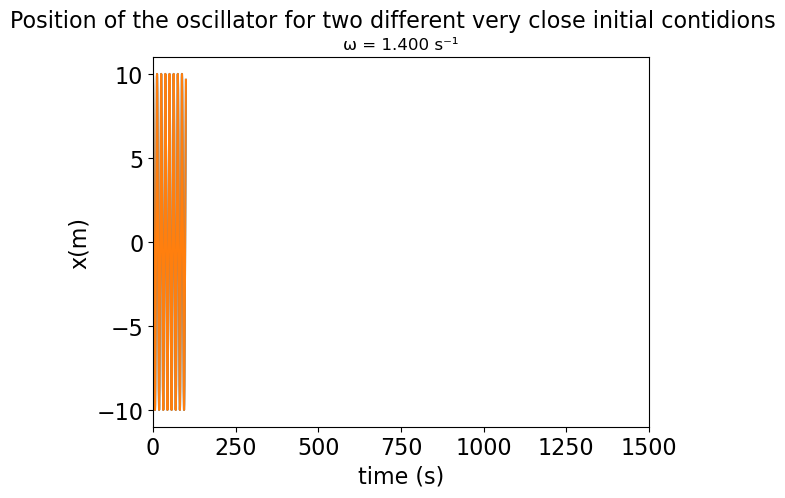

In [14]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.plot(t,x)
plt.plot(t,x2)
plt.xlim([0,1500])
plt.suptitle('Position of the oscillator for two different very close initial contidions',fontsize = 16)
plt.title('ω = '+str(format(w,'.3f'))+' s⁻¹')
plt.ylabel('x(m)',fontsize = 16)
plt.xlabel('time (s)',fontsize = 16)
#plt.savefig('ejemplo4.png')

In [13]:
def update_x(num,x,v,x2,v2):
    plt.cla()
    plt.plot(x[num*250],'.',color='red',markersize='10')
    plt.plot(x2[num*250],'.',color='blue',markersize='10')
    plt.ylim([-0.01,1.2])
    plt.xlim([-0.1,0.1])
    plt.suptitle('Oscillator evolution with time (ω = '+str(format(w,'.3f'))+' s⁻¹)')
    plt.xticks([])
    plt.ylabel('x (m)')
    plt.title('t = '+str(format(num*0.25,'.2f'))+' s')

KeyboardInterrupt: 

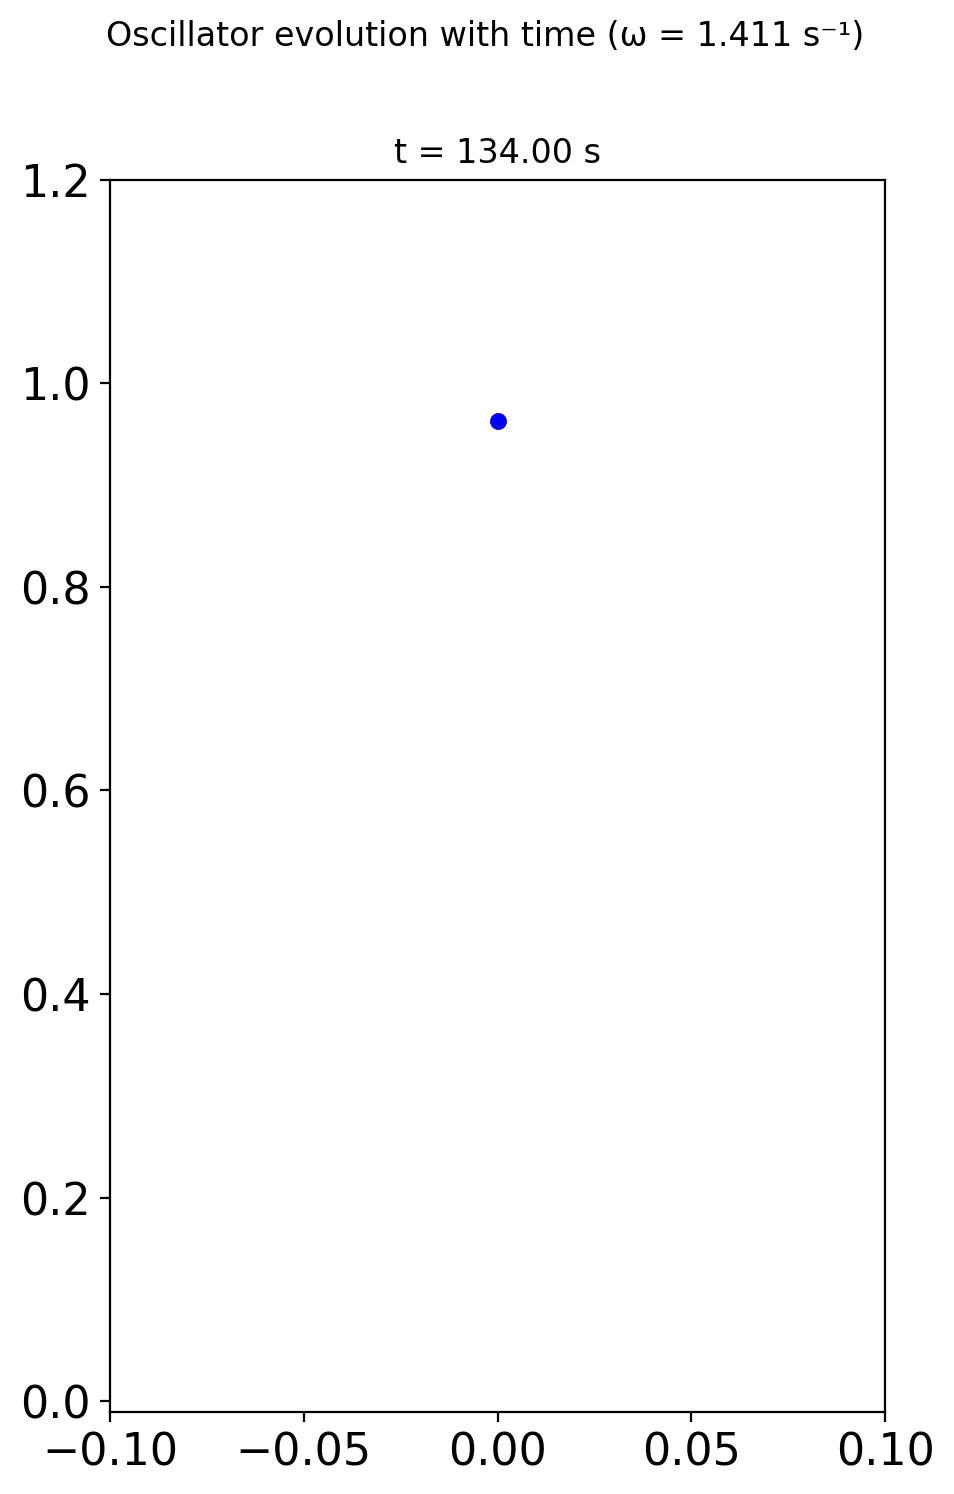

In [14]:
imT = plt.figure(figsize=(5,8),dpi=200)
figT1 = plt.plot(x[0],'.',color='red',markersize='10')
figT2 = plt.plot(x2[0],'.',color='blue',markersize='10')

animP = animation.FuncAnimation(imT, update_x, 600, fargs = (x,v,x2,v2 ), interval = 50)
animP.save('prueba.gif')
animP.save('prueba.mp4')

In [18]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

In [17]:
def update_x(num,x,v):
    plt.cla()
    plt.plot(x[num*100],v[num*100],'.',color='red',markersize='10')
    plt.ylim([-6,6])
    plt.xlim([-6,6])
    plt.xlabel('x',fontsize = 14)
    plt.ylabel('p',fontsize = 14)
    plt.title('t = '+str(format(num,'.2f'))+' s',)

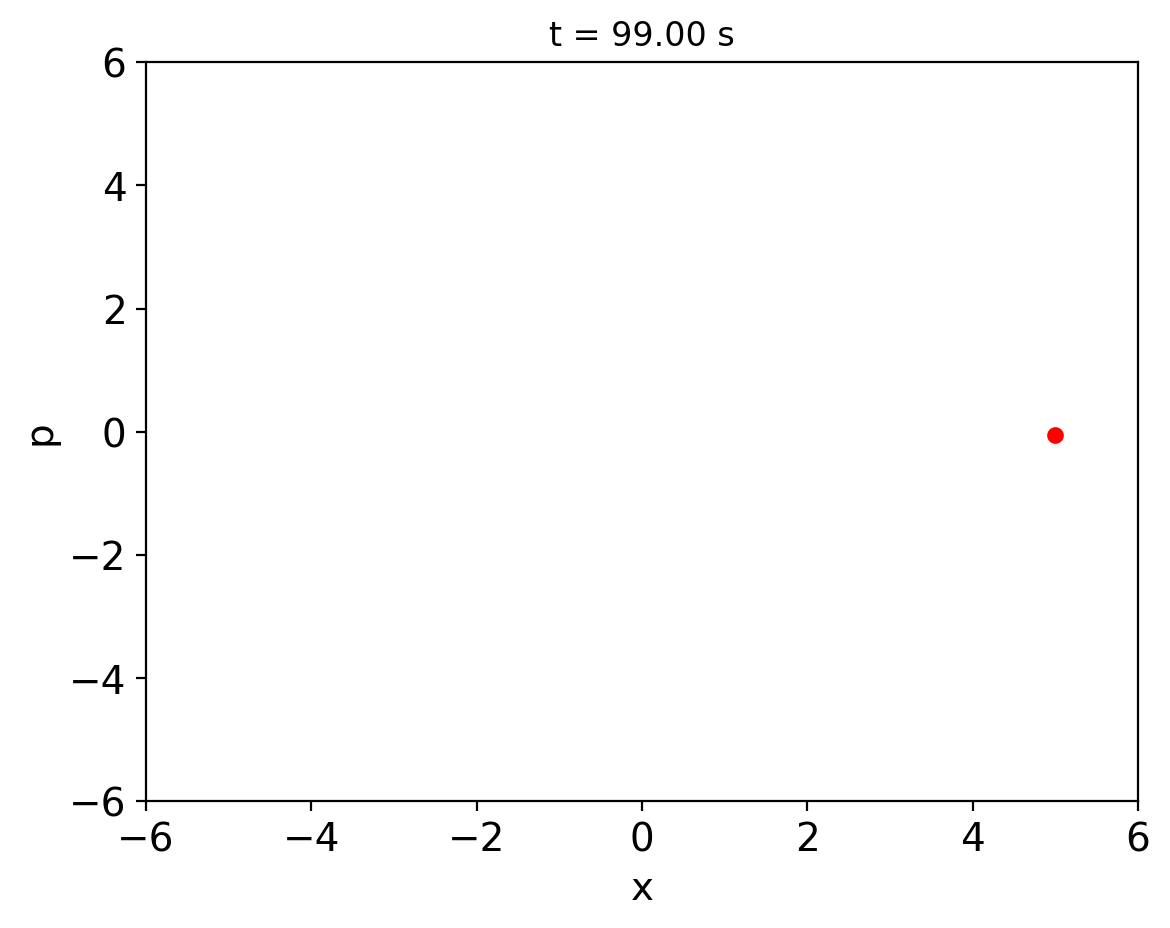

In [19]:
imT = plt.figure(dpi=200)
figT1 = plt.plot(x[0],v[0],'.',color='red',markersize='10')

animP = animation.FuncAnimation(imT, update_x, 100, fargs = (x,v), interval = 50)
animP.save('prueba2.gif')
animP.save('prueba2.mp4')